<a href="https://colab.research.google.com/github/kingkong135/Viblo/blob/master/X%E1%BB%AD%20l%C3%BD%20%E1%BA%A3nh/Tu%E1%BA%A7n%203/Week_3_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_path = "drive/My Drive/Colab Notebooks/image processing/week 3/"

In [0]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [10,8]


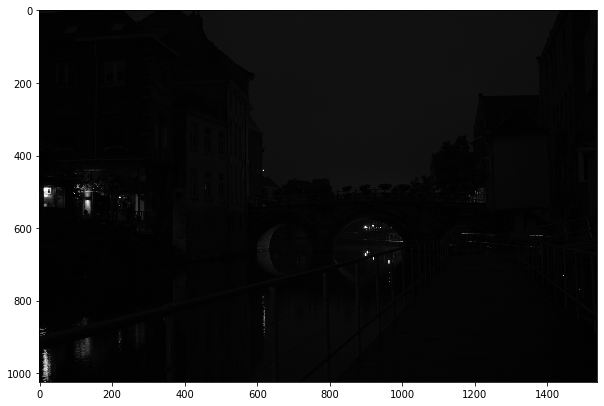

In [4]:
img = cv2.imread(root_path + "low-exposure.jpg", 0)
plt.imshow(img, cmap = 'gray')

# 1. Calculate Histogram
1. Using `cv2.calcHist` from OpenCV
2. Using `numpy.histogram` function

In [0]:
# using cv2.calcHist()
hist = cv2.calcHist(
      [img],
      channels = [0],
      mask=None, # full image
      histSize=[256], #full scale
      ranges=[0,256]
)

In [6]:
hist.shape

(256, 1)

In [7]:
sum(hist)

array([1574912.], dtype=float32)

In [8]:
img.shape[0] * img.shape[1]

1574912

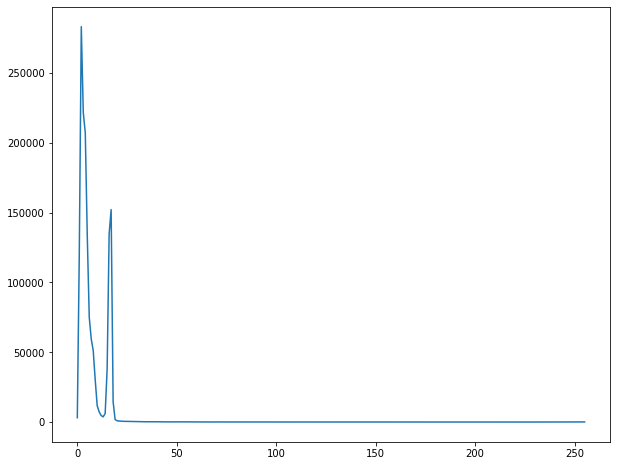

In [9]:
plt.plot(hist)

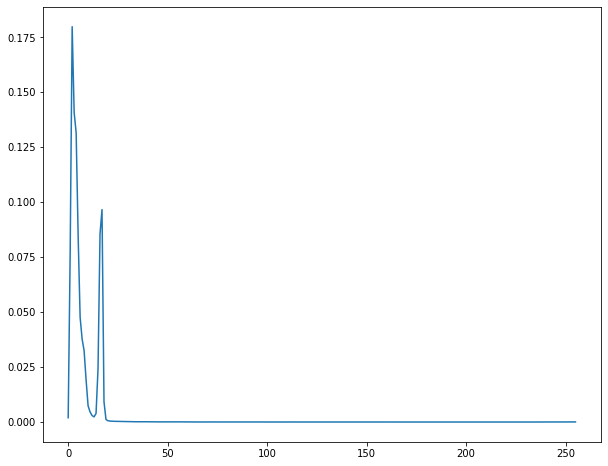

In [10]:
#normalized histogram
h, w = img.shape[:2]
normalized_hist = hist/(h*w)
plt.plot(normalized_hist)

In [0]:
def plot_img_and_hist(img):
  '''Draw image together with its histogram and cdf'''
  hist = cv2.calcHist(
              [img],
              channels=[0],
              mask=None, #full image
              histSize=[256], #full scale
              ranges=[0,256]
  )
  h,w = img.shape[:2]
  normalized_hist = hist/(h*w)
  cdf = normalized_hist.cumsum()
  plt.subplot(1,2,1)
  plt.imshow(img, cmap = 'gray')
  plt.subplot(1,2,2)
  plt.plot(normalized_hist, 'r')
  plt.plot(cdf, 'b--')
  plt.legend(('histogram', 'cdf'), loc = 'upper left')

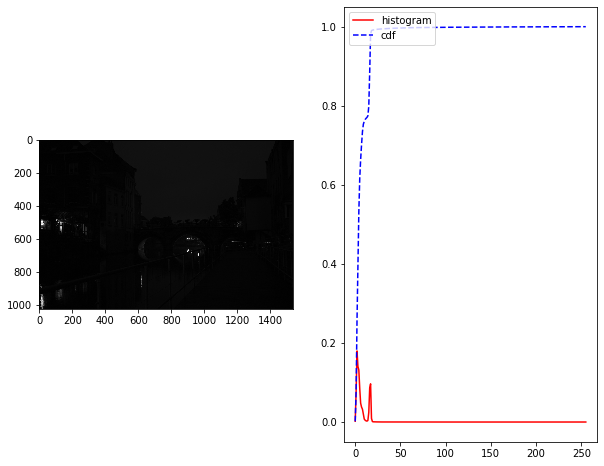

In [12]:
plot_img_and_hist(cv2.imread(root_path + "low-exposure.jpg", 0))

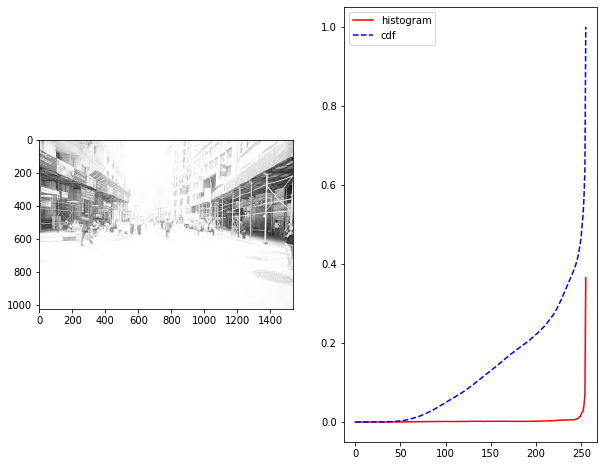

In [13]:
plot_img_and_hist(cv2.imread(root_path + "high-exposure.jpg", 0))

In [0]:
# from week 2
def adjust_image_gamma_lookuptable(image, gamma = 1.0):
  table = np.array([((i/255.0) ** gamma) * 255 
      for i in np.arange(0,256)]).astype("uint8")
  return cv2.LUT(image, table)

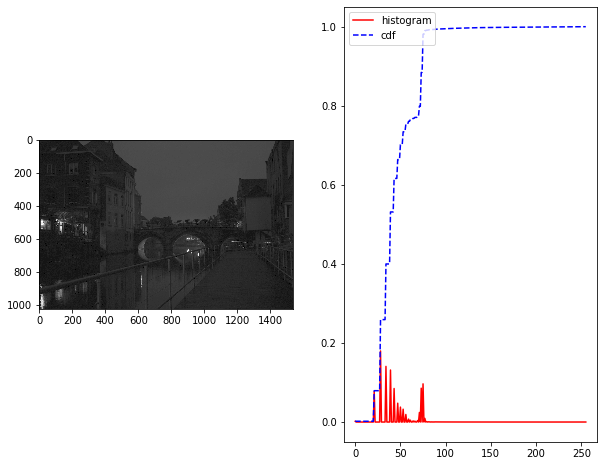

In [15]:
img_adjusted = adjust_image_gamma_lookuptable(img, gamma=0.45)
plot_img_and_hist(img_adjusted)

(256,)


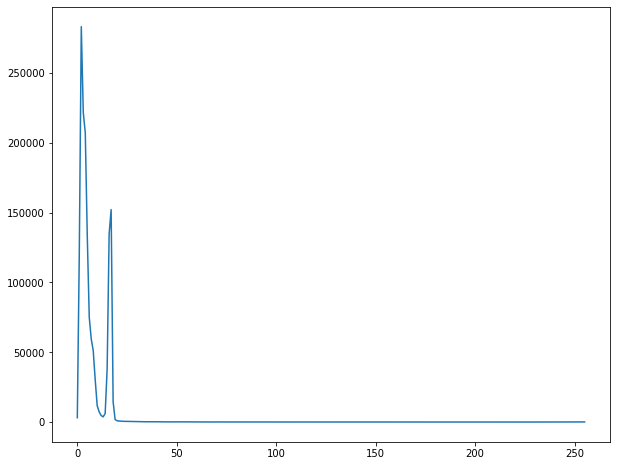

In [16]:
#using numpy
h2 = np.histogram(img.ravel(), bins=256, range=[0,256])
print(h2[0].shape)
plt.plot(h2[0])

# 2. Histogram equaliztion

In [0]:
def hist_equalize(img):
  # 1. calclate hist
  hist = cv2.calcHist([img], [0], None, [256], [0, 256])

  # 2. normalize hist
  h, w = img.shape[:2]
  hist = hist/(h*w)

  # 3. calculate CDF
  cdf = np.cumsum(hist)
  s_k = (255 * cdf - 0.5).astype("uint8")
  return s_k

In [19]:
# view the conversion s_k
hist_equalize(img)

array([  0,  19,  65, 101, 135, 156, 168, 178, 186, 191, 193, 194, 195,
       195, 196, 203, 224, 249, 251, 252, 252, 252, 252, 252, 252, 252,
       252, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 25

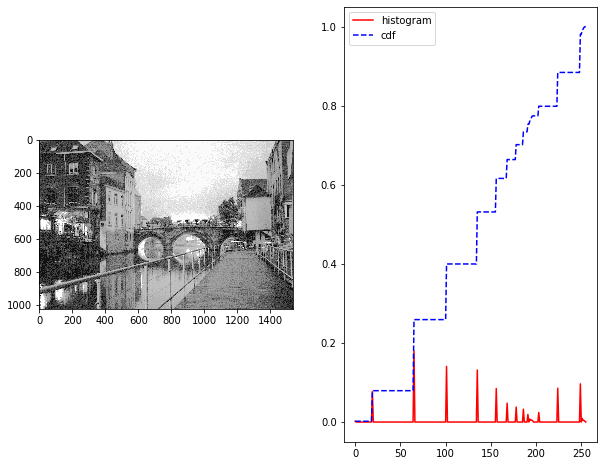

In [20]:
s_k = hist_equalize(img)
equalized_img = cv2.LUT(img, s_k)
plot_img_and_hist(equalized_img)

# Using OpenCv function

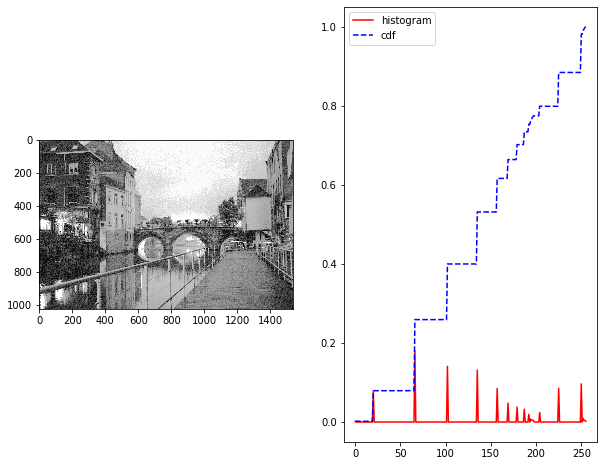

In [21]:
img_equalized = cv2.equalizeHist(img)
plot_img_and_hist(img_equalized)

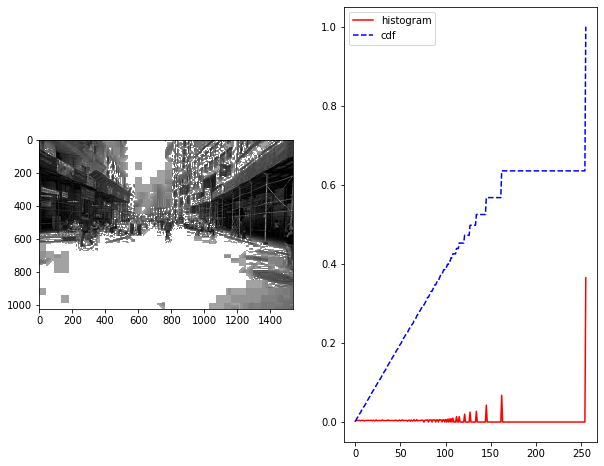

In [23]:
high_exposure_img = cv2.imread(root_path + 'high-exposure.jpg', 0)
he_equalized = cv2.equalizeHist(high_exposure_img)
plot_img_and_hist(he_equalized)

# 3. Adaptive Histogram equalization

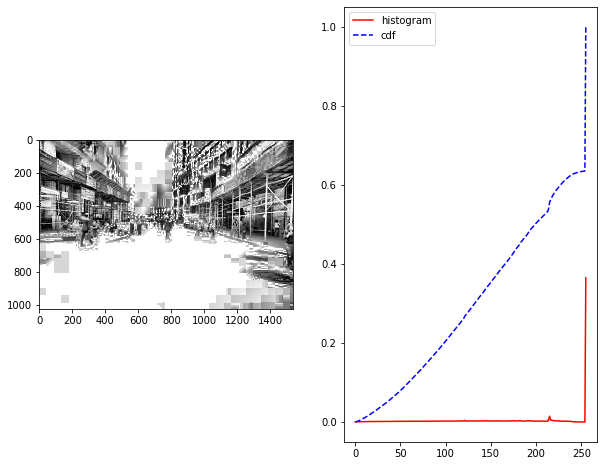

In [25]:
clahe = cv2.createCLAHE(clipLimit=40, tileGridSize=(8,8))
high_clahe = clahe.apply(high_exposure_img)
plot_img_and_hist(high_clahe)

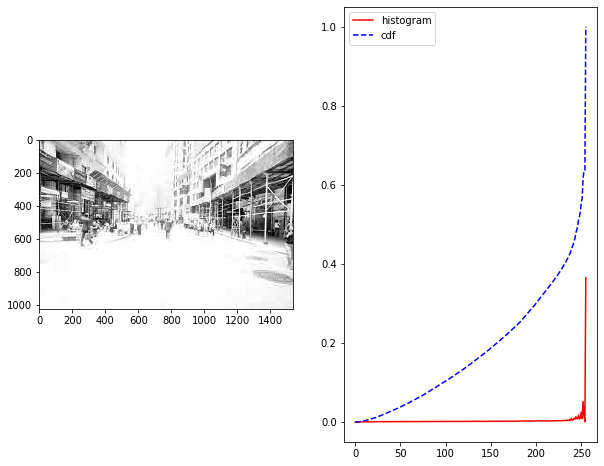

In [26]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
high_clahe = clahe.apply(high_exposure_img)
plot_img_and_hist(high_clahe)

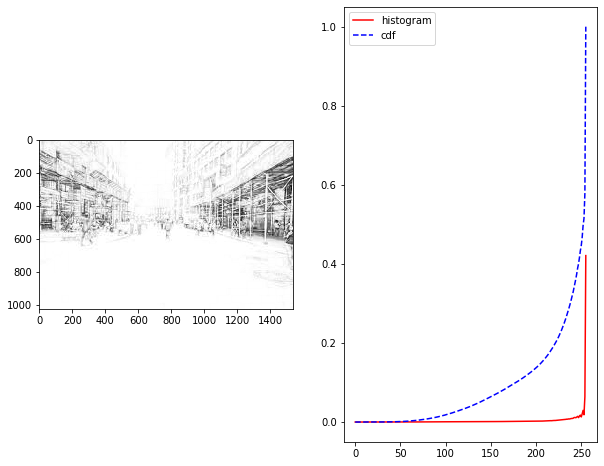

In [27]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(100,100))
high_clahe = clahe.apply(high_exposure_img)
plot_img_and_hist(high_clahe)

# 4. Histogram matching

In [0]:
def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)
    result = interp_t_values[bin_idx].reshape(oldshape)
    result = result.astype(np.uint8)
    return result

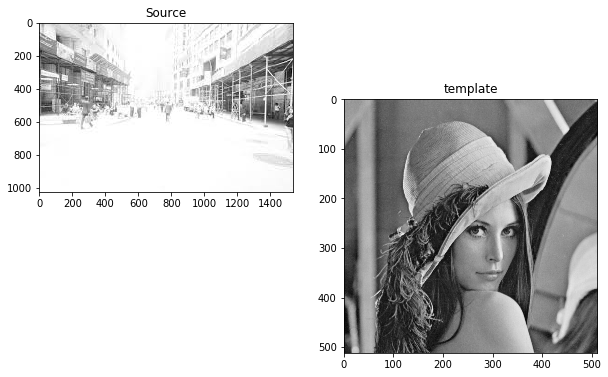

In [29]:
source = cv2.imread(root_path + "high-exposure.jpg", 0)
template = cv2.imread(root_path + "lena.jpg",0)
plt.subplot(2, 2, 1)
plt.imshow(source, cmap='gray')
plt.title("Source")
plt.subplot(1,2,2)
plt.imshow(template, cmap='gray')
plt.title("template")
plt.show()

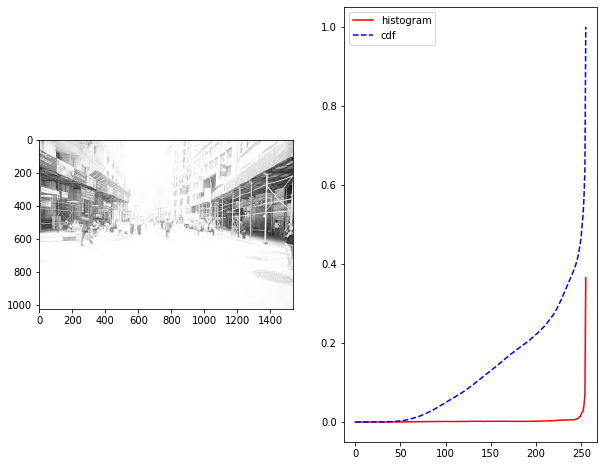

In [31]:
plot_img_and_hist(source)


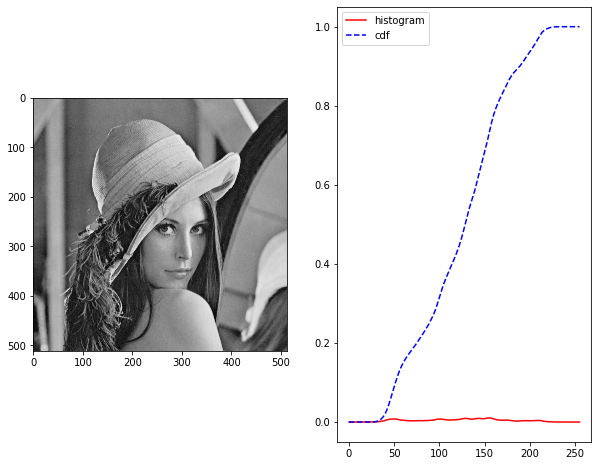

In [32]:
plot_img_and_hist(template)

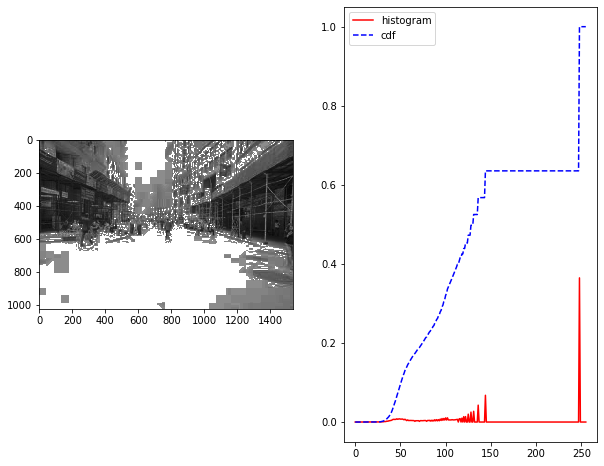

In [33]:
he_matched = hist_match(source, template)
plot_img_and_hist(he_matched)

# 5. Image retrieval using histogram

Flower data from: http://www.robots.ox.ac.uk/~vgg/data/flowers/17/index.html

In [0]:
def calcHist(img, bins_per_channel=20):
  '''
  img with shape (h,w,3)
  '''
  h, w = img.shape[:2]
  hist = [
      np.histogram(img[:,:, i], bins=20, range=(0, 256))[0]
      for i in range(3)
  ]
  hist = np.array(hist).ravel()
  hist = hist/(h*w)
  return hist

In [0]:
#all images
import glob
inames = glob.glob(root_path + "./flowers/*.jpg")
images = [
            cv2.imread(iname)
            for iname in inames
]
#all histograms
xs = [ 
            calcHist(img)
            for img in images
]


In [0]:
#input image
from scipy.spatial import distance
input_img = images[0]
input_hist = xs[0]
all_dists = [
                distance.euclidean(input_hist, xi)
                for xi in xs
]

sorted_idxs = np.argsort(all_dists)

ranked_images = [images[i] for i in sorted_idxs]

In [44]:
sorted_idxs

array([ 0,  6,  1, 10,  5,  2,  9,  8, 11,  7,  3,  4])

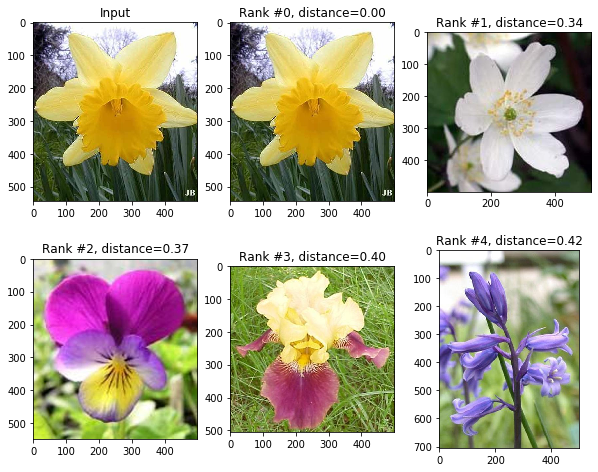

In [46]:
#plot top 5 images
plt.subplot(2, 3, 1)
plt.imshow(input_img[:,:,::-1])
plt.title("Input")
for i in range(0, 5):
    plt.subplot(2, 3, i+2)
    idx = sorted_idxs[i]
    found = ranked_images[i]
    dist = all_dists[idx]
    plt.imshow(found[:,:,::-1])
    plt.title("Rank #{}, distance={:.2f}".format(i, dist))
plt.show()